<h1> The Ichimoku Cloud Strategy </h1>
<a href = "https://wire.insiderfinance.io/the-ichimoku-cloud-strategy-a-beautiful-blob-of-mess-5033b7b00f5c"> Thank you for the Guide </a>

In [1]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from yahoo_fin.stock_info import get_data

In [2]:
# Read data
# Rename and reformat pricing to 2 decimal places 
# Return new data
def read_data(tick_symbol, start_date, end_date):
    data = get_data(tick_symbol, start_date=start_date, end_date=end_date, index_as_date = False)
    return data

In [4]:
def ichimoku_cloud(data):
    
    #Design layout formats
    fig = plt.figure()
    first = plt.figure(figsize=(60,12.5))
    second = plt.figure(figsize=(60,12.5))
    ax = first.add_subplot(121)
    ax2 = second.add_subplot(122)
    
    #Calculate the 9-period High and Low
    period_high_9 = data['high'].rolling(9).max()
    period_low_9 = data['low'].rolling(9).min()
    data['conversion_line'] = (period_high_9 + period_low_9)/2 #find the average 
    
    #Calculate the 26-period high and low
    period_high_26 = data['high'].rolling(26).max()
    period_low_26 = data['high'].rolling(26).min()
    data['base_line'] = (period_high_26 + period_low_26)/2 #find the average
    
    #Use the conversion and base lines, find the average
    data['lead_span_A'] = (data['conversion_line'] + data['base_line'])/2
    
    #Calculate the 52-period high and low
    period_high_52 = data['high'].rolling(52).max()
    period_low_52 = data['low'].rolling(52).min()  
    data['lead_span_B'] = (period_high_52 + period_low_52)/2 #find the average...again
    
    #Calculate the lagging span, observe the past 26 periods using .shift()
    data['lag'] = data['close'].shift(-26)
    
    #Plot main graph (Ichimoku Clouds ONLY)
    graph = sns.lineplot(data = data, x = 'date', y = 'close', ax = ax, label = 'Close')
    sns.lineplot(data = data, x = 'date', y = 'lead_span_A', ax = ax, label = 'Senkou Span A', color = 'green')
    sns.lineplot(data = data, x = 'date', y = 'lead_span_B', ax = ax, label = 'Senkou Span B', color = 'red')
    graph.set_title("Ichimoku Cloud")
    
    #Color in the difference between Span A and B with green (uptrend) and coral (downtrend)
    ax.fill_between(data.date, data['lead_span_A'], data['lead_span_B'],
                    where=data['lead_span_A'] >= data['lead_span_B'], color='lightgreen')

    ax.fill_between(data.date, data['lead_span_A'], data['lead_span_B'],
                    where=data['lead_span_A'] < data['lead_span_B'], color='coral')
    
    #Plot bottom graph, crossover signals between Conventional, Base and lagging lines
    bottom_plot = sns.lineplot(data = data, x = 'date', y = 'close', ax = ax2, label = 'Close', alpha = 0.5, color = 'blue')
    sns.lineplot(data = data, x = 'date', y = 'lag', ax =ax2, color = 'orange', label = 'Chikou Span')
    bottom_plot.set_title('Crossover Signals: Tenkan San, Kijun San, Chikou Span')
    #---------------------------------------------------------------------------------------------------#

    #Now determine signals...like always 
    buy = []
    sell = []
    flag = -1 #conditioned to plot ONLY Crossovers 
    
    for i in range(len(data['close'])):
        if data['conversion_line'][i] > data['base_line'][i]:
            if flag != 1:
                sell.append(np.nan)
                buy.append(data['close'][i])
                flag = 1
            else:
                sell.append(np.nan)
                buy.append(np.nan)
        elif data['conversion_line'][i] <= data['base_line'][i]:
            if flag != 0:
                sell.append(data['close'][i])
                buy.append(np.nan)
                flag = 0
            else:
                sell.append(np.nan)
                buy.append(np.nan)
        else:
            sell.append(np.nan)
            buy.append(np.nan)

    data['buy_sig'] = buy
    data['sell_sig'] = sell
    
    #plot ALL signals (FOR DEMONSTRATION), commonly it should mostly be the current signal
    plt.scatter(data['date'], data['buy_sig'], marker = '^', color = 'green', alpha = 1)
    plt.scatter(data['date'], data['sell_sig'], marker = 'v', color = 'red', alpha = 1)

Ticker Symbol:  TSLA
Start Date (YYYY-MM-DD):  2022-01-01
End Date (YYYY-MM-DD):  2022-07-30


<Figure size 432x288 with 0 Axes>

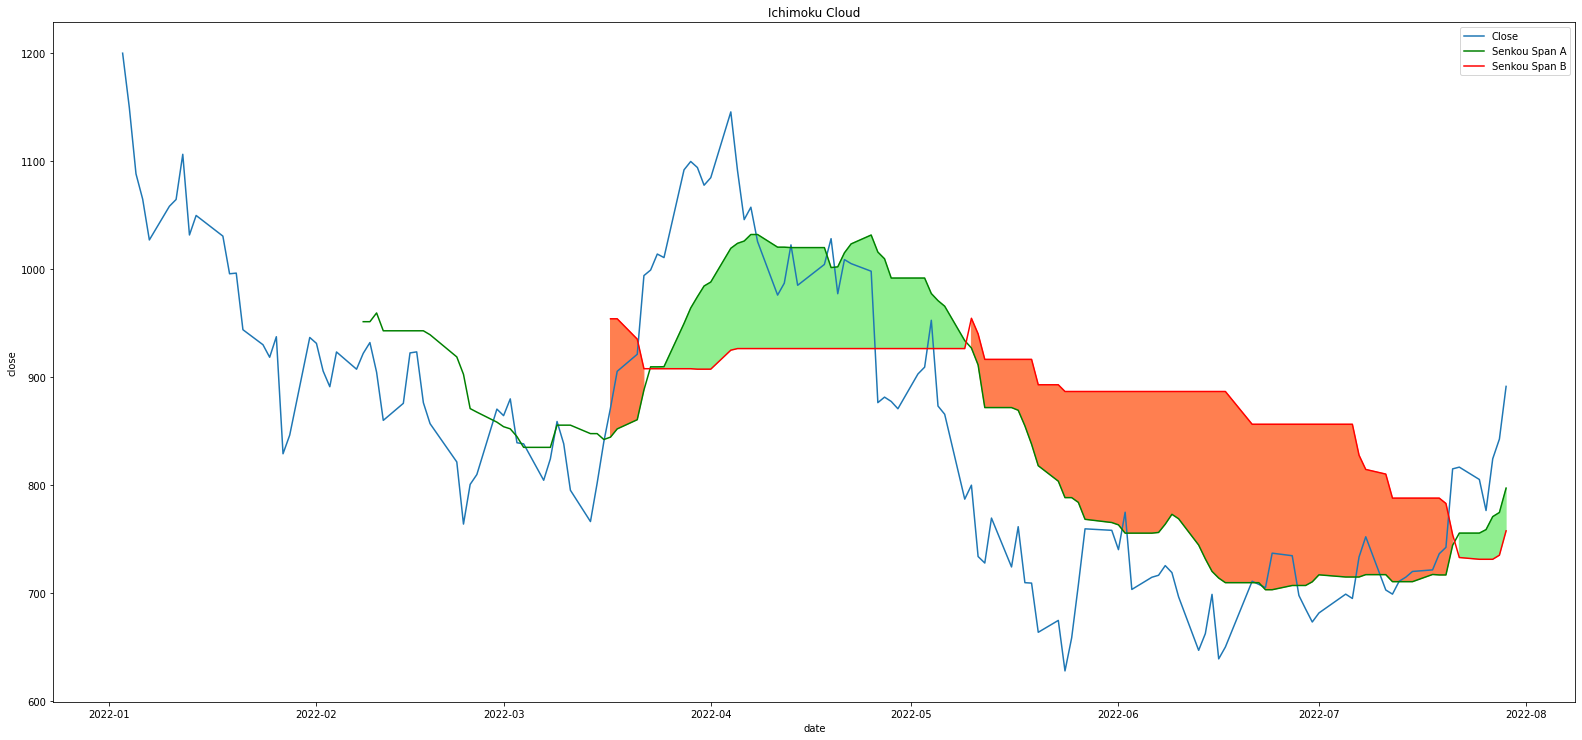

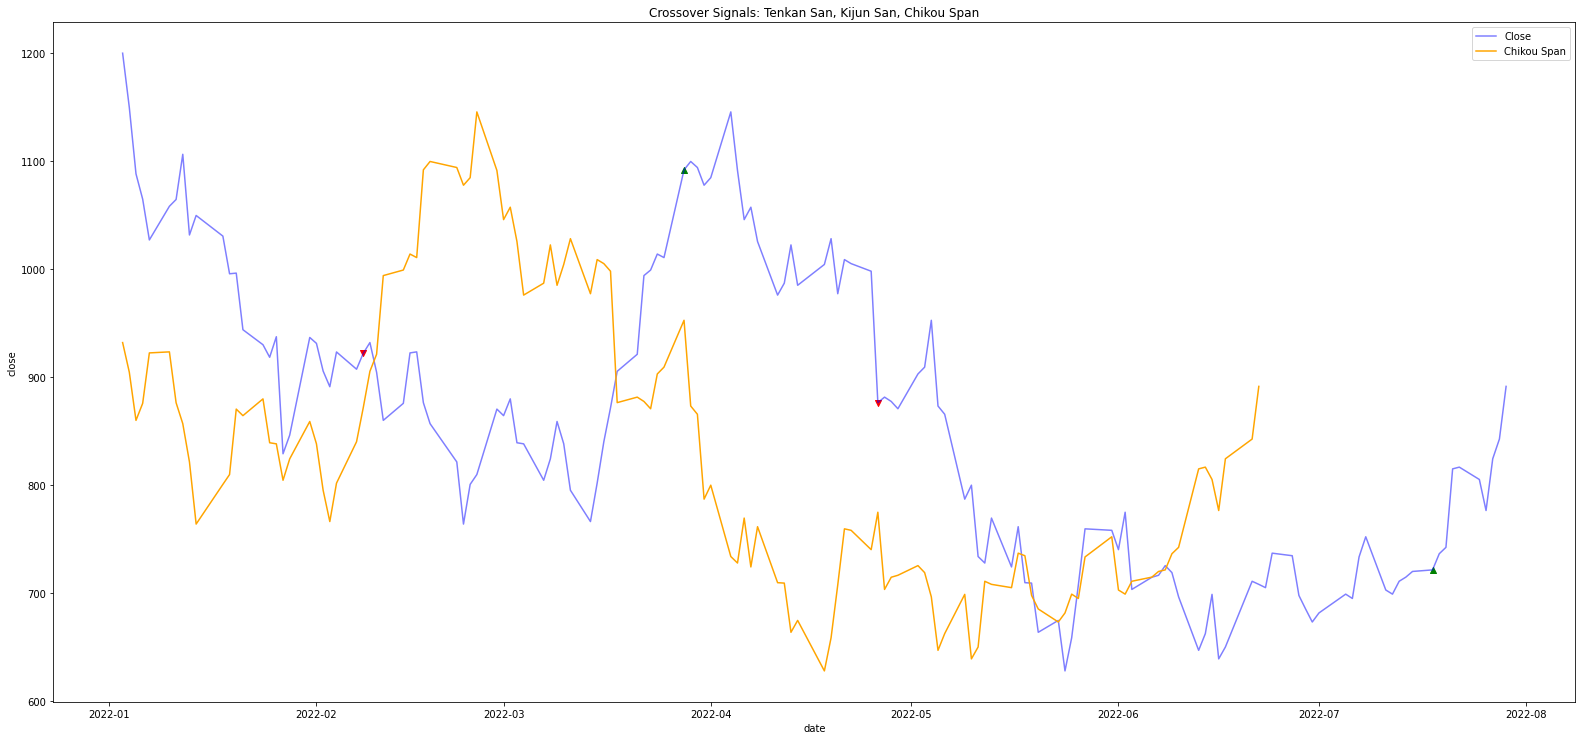

In [10]:
#Driver function that allows you to input different stock inputs and timeslots
if __name__ == "__main__": 
    tick_symbol = input("Ticker Symbol: ")
    start_date = input("Start Date (YYYY-MM-DD): ")
    end_date = input("End Date (YYYY-MM-DD): ")
    data = read_data(tick_symbol, start_date, end_date)
    ichimoku_cloud(data)